In [1]:
"""import packages you need"""
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [71]:
df_0 = pd.read_csv('RawData/two_widths/Param0_2width.csv')
df_1 = pd.read_csv('RawData/two_widths/Param1_2width.csv')
df_2 = pd.read_csv('RawData/two_widths/Param2_2width.csv')
df_3 = pd.read_csv('RawData/two_widths/Param3_2width.csv')
df_4 = pd.read_csv('RawData/two_widths/Param4_2width.csv')


df1 = pd.concat([df_0, df_1, df_2, df_3, df_4], axis = 0, ignore_index = True)

##### To make sure there is no duplication
# grp = df1.groupby(['Frequency', 'Speed', 'Amplitude','Passes','Focal_Position'], as_index=False).mean()
# combined_Exp = grp


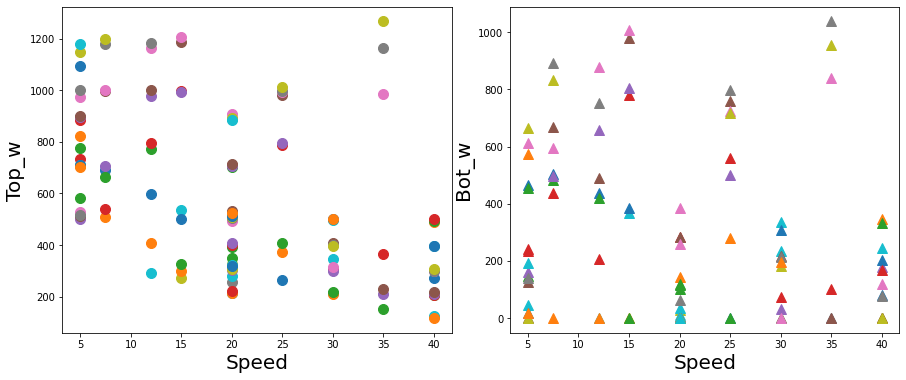

In [5]:
"""As f=40*V, one of them is independent variable and we need to look at their changes
at the same time, because there are no two cases that their f, A, N, F_l be the same
but their speed be different """

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

plt.subplots_adjust(wspace=0.15)

grouped_df = df1.groupby(['Frequency', 'Amplitude', \
                                'Passes','Focal_Position'], as_index=False)
for key, item in grouped_df:

    ax1.plot(grouped_df.get_group(key).Speed, grouped_df.get_group(key).Top_width, 'o-',ms=10)
    ax2.plot(grouped_df.get_group(key).Speed, grouped_df.get_group(key).Bot_width, '^-',ms=10)
# plt.legend()
ax1.set_xlabel('Speed', fontsize=20)
ax1.set_ylabel('Top_w', fontsize=20)

ax2.set_xlabel('Speed', fontsize=20)
ax2.set_ylabel('Bot_w', fontsize=20)
plt.show()

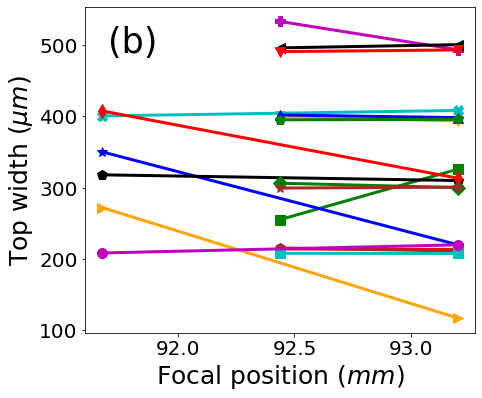

In [5]:
#### Top width_frequency
fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(111)

plt.subplots_adjust(wspace=0.2)

grouped_df = df1.groupby(['Frequency', 'Amplitude', \
                             'Speed','Passes'], as_index=False)

colors = ["g","r", "b", "k", "orange", "c", "m", 'brown']
markers = ["s", "o", "*", "p","v" ,"X", "P", "h", "D", "d",  "^", "<", ">"]


i = -1
for key, item in grouped_df:
    if item.shape[0] > 1 :
        i += 1
        ax1.plot(grouped_df.get_group(key).Focal_Position,\
                 grouped_df.get_group(key).Top_width, \
                 marker=markers[i%13],c = colors[i%8],lw=3,ms=10)

ax1.text(91.7,490,'(b)',fontsize= 35)

ax1.set_xlabel('Focal position ($mm$)', fontsize=25)
ax1.set_ylabel('Top width ($\\mu m$)', fontsize=25)


ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

plt.savefig('Graphs/Fig4_b.png',bbox_inches='tight')

plt.show()

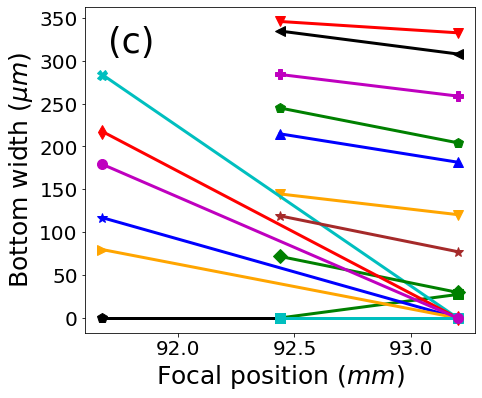

In [6]:
#### Bottom width_frequency
fig = plt.figure(figsize=(7,6))
ax2 = fig.add_subplot(111)

plt.subplots_adjust(wspace=0.2)

grouped_df = df1.groupby(['Frequency', 'Amplitude', \
                             'Speed','Passes'], as_index=False)

colors = ["g","r", "b", "k", "orange", "c", "m", 'brown']
markers = ["s", "o", "*", "p","v" ,"X", "P", "h", "D", "d",  "^", "<", ">"]


i = -1
for key, item in grouped_df:
    if item.shape[0] > 1 :
        i += 1

        ax2.plot(grouped_df.get_group(key).Focal_Position,\
                 grouped_df.get_group(key).Bot_width, \
                 marker=markers[i%13],c = colors[i%8],lw=3,ms=10)

ax2.text(91.7,310,'(c)',fontsize= 35)

ax2.set_xlabel('Focal position ($mm$)', fontsize=25)
ax2.set_ylabel('Bottom width ($\\mu m$)', fontsize=25)

ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('Graphs/Fig4_c.png',bbox_inches='tight')

plt.show()

# Linear regression to show the general trend

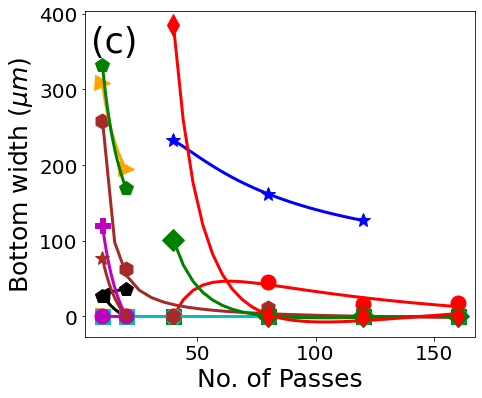

In [88]:
fig = plt.figure(figsize=(7,6))
ax2 = fig.add_subplot(111)

plt.subplots_adjust(wspace=0.2)
model1 = Pipeline([
    ('linear_regression', LinearRegression())
])

grouped_df = df1.groupby(['Frequency', 'Speed','Amplitude' \
                                , 'Focal_Position'], as_index=False)
colors = ["g","r", "b", "k", "orange", "c", "m", 'brown']
markers = ["s", "o", "*", "p","v" ,"X", "P", "h", "D", "d",  "^", "<", ">"]

i = 0
for key, item in grouped_df:
    
    if item.shape[0] >= 2 :
        x = grouped_df.get_group(key).Passes
        z = grouped_df.get_group(key).Bot_width
        LR2 = LinearRegression()
        X2 = np.c_[np.ones(len(z)),x.values ** (-1),\
                  x.values ** (-3)]
        result = LR2.fit(X2, z)
        xx = np.linspace(min(x.values), max(x.values), 30)
        Xcont = np.c_[np.ones(len(xx)), 1/xx, 1/(xx**3)]
        zp = LR2.predict(Xcont)
        ax2.plot(x, z,marker=markers[i%13],lw=0, c = colors[i%8],ms=15)
        ax2.plot(xx,zp, c = colors[i%8], lw=3)
        
        i += 1


ax2.text(5,350,'(c)',fontsize= 35)

ax2.set_xlabel('No. of Passes', fontsize=25)
ax2.set_ylabel('Bottom width ($\\mu m$)', fontsize=25)

ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('Graphs/Fig3_c.png',bbox_inches='tight')



plt.show()

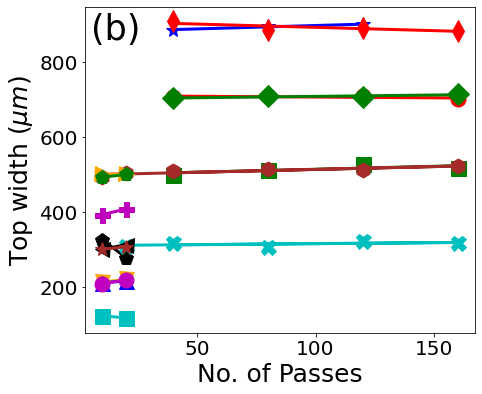

In [87]:
fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(111)

plt.subplots_adjust(wspace=0.2)
model1 = Pipeline([
    ('linear_regression', LinearRegression())
])

grouped_df = df1.groupby(['Frequency', 'Speed','Amplitude' \
                                , 'Focal_Position'], as_index=False)
colors = ["g","r", "b", "k", "orange", "c", "m", 'brown']
markers = ["s", "o", "*", "p","v" ,"X", "P", "h", "D", "d",  "^", "<", ">"]

i = 0
for key, item in grouped_df:
    
    if item.shape[0] >= 2 :
        x = grouped_df.get_group(key).Passes
        y = grouped_df.get_group(key).Top_width
        Model1 = model1.fit((np.array(x)).reshape(-1,1), y)
        y_ln = Model1.predict((np.array(x)).reshape(-1,1))
        ax1.plot(x,y, marker=markers[i%13],c = colors[i%8],lw=0, ms=15)
        ax1.plot(x,y_ln, '-',c = colors[i%8], lw=3)

        i += 1

ax1.text(5,860,'(b)',fontsize= 35)
ax1.set_xlabel('No. of Passes', fontsize=25)
ax1.set_ylabel('Top width ($\\mu m$)', fontsize=25)

ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

plt.savefig('Graphs/Fig3_b.png',bbox_inches='tight')



plt.show()

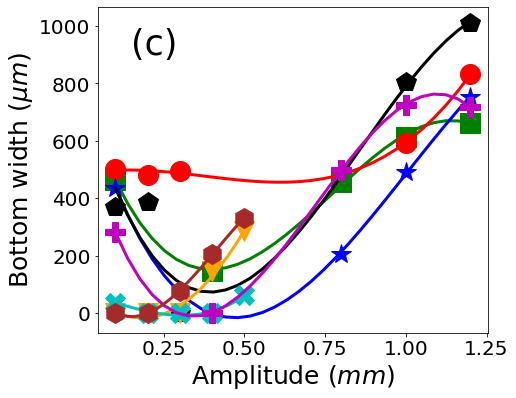

In [25]:
fig = plt.figure(figsize=(7,6))
ax2 = fig.add_subplot(111)

plt.subplots_adjust(wspace=0.25)
model1 = Pipeline([
    ('linear_regression', LinearRegression())
])

grouped_df = df1.groupby(['Frequency', 'Speed','Passes' \
                                , 'Focal_Position'], as_index=False)
colors = ["g","r", "b", "k", "orange", "c", "m", 'brown']
markers = ["s", "o", "*", "p","v" ,"X", "P", "h", "D", "d",  "^", "<", ">"]
LR2 = LinearRegression()
i = 0
for key, item in grouped_df:
    
    if item.shape[0] >= 5 :
        x = grouped_df.get_group(key).Amplitude
        z = grouped_df.get_group(key).Bot_width
        X2 = np.c_[np.ones(len(z)),x.values, x.values**2, x.values**3]
        result = LR2.fit(X2, z)
        xx = np.linspace(min(x.values), max(x.values), 30)
        Xcont = np.c_[np.ones(len(xx)),xx, xx**2, xx**3]
        zp = LR2.predict(Xcont)
        ax2.plot(x, z,marker=markers[i%13],lw=0, c = colors[i%8],ms=20)
        ax2.plot(xx,zp, c = colors[i%8], lw=3)
        
        i += 1


ax2.text(0.15,900,'(c)',fontsize= 35)

ax2.set_xlabel('Amplitude ($m m$)', fontsize=25)
ax2.set_ylabel('Bottom width ($\\mu m$)', fontsize=25)

ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('Graphs/Fig2_c.png',bbox_inches='tight')


plt.show()

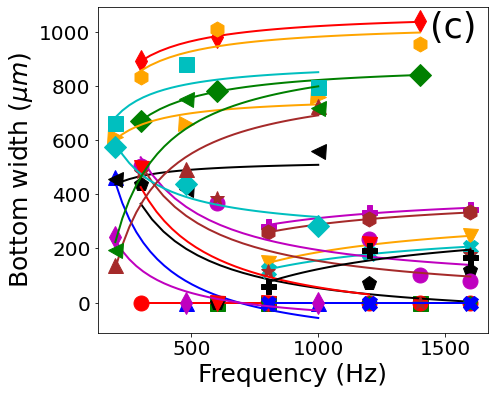

In [68]:
fig = plt.figure(figsize=(7,6))
ax2 = fig.add_subplot(111)

plt.subplots_adjust(wspace=0.2)
model1 = Pipeline([
    ('linear_regression', LinearRegression())
])

grouped_df = df1.groupby(['Passes','Amplitude' \
                                , 'Focal_Position'], as_index=False)
colors = ["g","r", "b", "k", "orange", "c", "m", 'brown']
markers = ["s", "o", "*", "p","v" ,"X", "P", "h", "D", "d",  "^", "<", ">"]

i = 0
for key, item in grouped_df:
    
    if item.shape[0] >= 3 :
        x = grouped_df.get_group(key).Frequency
        z = grouped_df.get_group(key).Bot_width
        LR2 = LinearRegression()
        X2 = np.c_[np.ones(len(z)),x.values ** (-1)]

        result = LR2.fit(X2, z)
        xx = np.linspace(min(x.values), max(x.values), 30)
        Xcont = np.c_[np.ones(len(xx)), 1/xx]
        zp = LR2.predict(Xcont)
        ax2.plot(x, z,marker=markers[i%13],lw=0, c = colors[i%8],ms=15)
        ax2.plot(xx,zp, c = colors[i%8], lw=2)
        
        i += 1


ax2.text(1440,980,'(c)',fontsize= 35)

ax2.set_xlabel('Frequency (Hz)', fontsize=25)
ax2.set_ylabel('Bottom width ($\\mu m$)', fontsize=25)

ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('Graphs/Fig5_c.png',bbox_inches='tight')



plt.show()

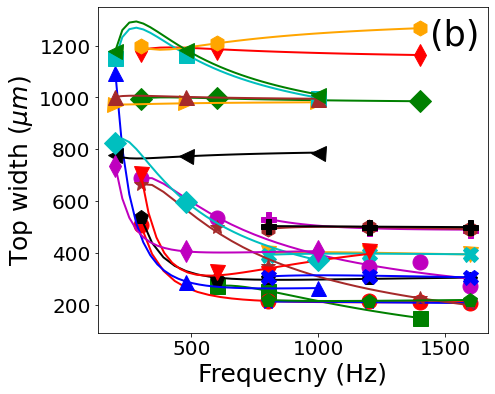

In [67]:
fig = plt.figure(figsize=(7,6))
ax2 = fig.add_subplot(111)

plt.subplots_adjust(wspace=0.2)
model1 = Pipeline([
    ('linear_regression', LinearRegression())
])

grouped_df = df1.groupby(['Passes','Amplitude' \
                                , 'Focal_Position'], as_index=False)
colors = ["g","r", "b", "k", "orange", "c", "m", 'brown']
markers = ["s", "o", "*", "p","v" ,"X", "P", "h", "D", "d",  "^", "<", ">"]

i = 0
for key, item in grouped_df:
    
    if item.shape[0] >= 3 :
        x = grouped_df.get_group(key).Frequency

        z = (grouped_df.get_group(key).Top_width)
        LR2 = LinearRegression()
        X2 = np.c_[np.ones(len(z)),x.values ** (-1),\
                  x.values ** (-3)]
        result = LR2.fit(X2, z)
        xx = np.linspace(min(x.values), max(x.values), 30)
        Xcont = np.c_[np.ones(len(xx)), 1/xx, 1/(xx**3)]
        zp = LR2.predict(Xcont)
        ax2.plot(x, z,marker=markers[i%13],lw=0, c = colors[i%8],ms=15)
        ax2.plot(xx,zp, c = colors[i%8], lw=2)
        
        i += 1

ax2.text(1440,1200,'(b)',fontsize= 35)

ax2.set_xlabel('Frequecny (Hz)', fontsize=25)
ax2.set_ylabel('Top width ($\\mu m$)', fontsize=25)

ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('Graphs/Fig5_b.png',bbox_inches='tight')



plt.show()

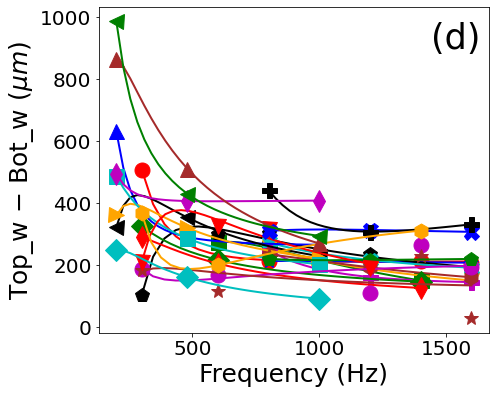

In [70]:
fig = plt.figure(figsize=(7,6))
ax2 = fig.add_subplot(111)

plt.subplots_adjust(wspace=0.2)
model1 = Pipeline([
    ('linear_regression', LinearRegression())
])

grouped_df = df1.groupby(['Passes','Amplitude' \
                                , 'Focal_Position'], as_index=False)
colors = ["g","r", "b", "k", "orange", "c", "m", 'brown']
markers = ["s", "o", "*", "p","v" ,"X", "P", "h", "D", "d",  "^", "<", ">"]

i = 0
for key, item in grouped_df:
    
    if item.shape[0] >= 3 :
        x = grouped_df.get_group(key).Frequency

        z = (grouped_df.get_group(key).Top_width-grouped_df.get_group(key).Bot_width)
        LR2 = LinearRegression()
        X2 = np.c_[np.ones(len(z)),x.values ** (-1),\
                  x.values ** (-3)]
        result = LR2.fit(X2, z)
        xx = np.linspace(min(x.values), max(x.values), 30)
        Xcont = np.c_[np.ones(len(xx)), 1/xx, 1/(xx**3)]
        zp = LR2.predict(Xcont)
        ax2.plot(x, z,marker=markers[i%13],lw=0, c = colors[i%8],ms=15)
        ax2.plot(xx,zp, c = colors[i%8], lw=2)
        
        i += 1

ax2.text(1440,900,'(d)',fontsize= 35)

ax2.set_xlabel('Frequency (Hz)', fontsize=25)
ax2.set_ylabel('Top_w $-$ Bot_w ($\\mu m$)', fontsize=25)

ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('Graphs/Fig5_d.png',bbox_inches='tight')



plt.show()